<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#작업-준비" data-toc-modified-id="작업-준비-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>작업 준비</a></span></li><li><span><a href="#데이터-다운로드" data-toc-modified-id="데이터-다운로드-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 다운로드</a></span></li><li><span><a href="#jupyter-실행" data-toc-modified-id="jupyter-실행-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>jupyter 실행</a></span></li><li><span><a href="#데이터-읽기" data-toc-modified-id="데이터-읽기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>데이터 읽기</a></span></li><li><span><a href="#입출력-데이터-생성" data-toc-modified-id="입출력-데이터-생성-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>입출력 데이터 생성</a></span></li><li><span><a href="#모델-생성" data-toc-modified-id="모델-생성-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>모델 생성</a></span></li><li><span><a href="#모델-훈련" data-toc-modified-id="모델-훈련-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>모델 훈련</a></span></li><li><span><a href="#그래프-확인" data-toc-modified-id="그래프-확인-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>그래프 확인</a></span></li><li><span><a href="#이어서..." data-toc-modified-id="이어서...-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>이어서...</a></span></li></ul></div>

# keras를 사용하여 암호화화폐 예측하기 - 1. 기본구성

<TOC>

cryptocompare 에서 제공하는 데이터를 활용하여 암호화화폐의 변동을 예측하는 코드를 작성합니다. 물론 재미로 보는 운세와 같은 `틀린 예측`입니다. 거래에 활용하면 돈을 잃을 수도 있습니다.

매 시각의 high, low 값을 활용하여 다음 시각의 high, low값을 예측합니다.

| 시각 | high | low |
|---- |----  |---- |
| 01:00 | 123 | 110 |
| 02:00 | 152 | 122 | 
| ... | ... | ... |
| 10:00 | 124 | 102 |
| 11:00 | ??? | ??? | 


## 작업 준비

파이썬을 실행할 수 있는 환경에서 시작합니다.

jupyter에서 작업하기 위해 jupyter를 설치합니다.

```sh
pip install jupyter
```

필요한 모듈을 설치합니다.

```sh
pip install keras tensorflow pandas matplotlib
```

## 데이터 다운로드 

[crypotcompare](https://www.cryptocompare.com/coins/xrp/charts/KRW?e=Bithumb&p=2W) 에서 다운 받을 데이터를 설정합니다. 

![](https://content.screencast.com/users/beneapp/folders/Snagit/media/2641d527-935c-4876-b569-96f708e24857/2018-01-27_14-57-01.png)

화페는 `xrp`, 단위는 `krw`, 거래소는 `bithume`, 기간은 `2w`로 설정하였습니다.

csv 로 저장합니다.

![](https://content.screencast.com/users/beneapp/folders/Snagit/media/7ca0a9d8-bb8a-4efc-b4ca-19fb39d79b91/2018-01-27_14-59-01.png)

다운받은 데이터를 확인합니다.
```
"time","timeDate","close","high","low","open","volumefrom","volumeto"
1515819600000,"2018-01-13",3023,3069,3001,3005,5748943.24,17411526929.22
1515823200000,"2018-01-13",3001,3028,2922,3023,4969552.48,14822283901.44
...
```

받은 데이터를 기반으로 앞으로 변동될 가격을 예측할 수 있는 모델을 만듭니다.

## jupyter 실행

jupyter를 실행합니다.
```sh
jupyter notebook
```

명령을 실행하는 위치를 기반으로 jupyter가 실행됩니다.

만약 한곳에서 실행되도록 jupyter의 홈경로를 설정하기를 원하면 설정파일`jupyter_notebook_config.py`을 변경한 후에 jupyter를 실행합니다.

Mac의 경우 `~/.jupyter/jupyter_notebook_config.py` 에 있습니다.

```
## The directory to use for notebooks and kernels.
#c.NotebookApp.notebook_dir = ''
c.NotebookApp.notebook_dir = '/원하는/경로로/설정합니다/jupyter'
```

## 데이터 읽기

새로운 노트북을 생성합니다. 
다운받은 csv 파일을 노트북이 있는 곳으로 이동합니다.
csv의 파일명을 `hour_Bithumb_XRP_KRW.csv`로 변경합니다.

필요한 모듈을 import 합니다.

In [1]:
import pandas as pd

파일을 읽어서 내용을 확인합니다.

In [2]:
file_name = 'hour_Bithumb_XRP_KRW.csv'
data = pd.read_csv(file_name)
data.head()

,time,timeDate,close,high,low,open,volumefrom,volumeto
0,1515888000000,2018-01-14,2875,2908,2851,2907,5210709.84,1.498953e+10
1,1515891600000,2018-01-14,2811,2883,2802,2875,5029618.20,1.429373e+10
2,1515895200000,2018-01-14,2786,2811,2700,2811,6784564.70,1.854825e+10
3,1515898800000,2018-01-14,2752,2814,2732,2786,5917546.04,1.632970e+10
4,1515902400000,2018-01-14,2659,2777,2609,2752,6380921.02,1.724873e+10


high, low 값만 사용하고, 빈값이 있으면 제거합니다.

In [3]:
high_low_data = data[['high','low']]
data = high_low_data.dropna(axis=0, how='any')
data.head()

,high,low
0,2908,2851
1,2883,2802
2,2811,2700
3,2814,2732
4,2777,2609


모든 값을 `0 ~ 1` 의 값으로 변경합니다.
모든 값에서, 최소값을 빼고, 최대값으로 나눠줍니다.

In [4]:
min_low = data.min(axis=0).low
data -= min_low

max_high = data.max(axis=0).high
data /= max_high

print('min:{}, max:{}'.format(min_low, max_high+min_low))

min:1012, max:2908


데이터 분리를 위해 array로 변경합니다.

In [5]:
data_arr = data.values
data_arr[:5]

array([[ 1.        ,  0.96993671],
       [ 0.98681435,  0.94409283],
       [ 0.94883966,  0.89029536],
       [ 0.95042194,  0.907173  ],
       [ 0.93090717,  0.84229958]])

## 입출력 데이터 생성

10개의 데이터를 순차적으로 입력하고 다음값을 예측합니다.
RNN 모델을 사용합니다.
입출력 데이터를 생성하는 함수를 작성합니다.

행을 숫자로, high를 `h`, low를 `l` 나타내면 다음과 같이 데이터를 표현할 수 있습니다.

```
1: 1h, 1l
2: 2h, 2l
3: 3h, 3l
...
```

이 데이터를 입출력에 사용할 데이터로 변경하면 다음과 같습니다. 예시에서는 3개의 입력데이터를 사용하는 것을 작성하겠습니다.

```
입력 1: [[1h, 1h], [2h, 2l], [3h, 3l]]
출력 1: [4h, 4l]
입력 2: [[2h, 2l], [3h, 3l], [4h, 4l]]
출력 2: [5h, 5l]
...
```

데이터의 길이를 확인합니다.

In [6]:
len(data_arr)

337

337 이고, 10개의 입력데이터를 사용할 것이므로, 337-10 = 327 개의 입출력 데이터를 생성합니다.

In [7]:
look_back = 10

data_x, data_y = [], []
for i in range(len(data_arr) - look_back):
    data_x.append(data_arr[i:(i+look_back)])
    data_y.append(data_arr[i+look_back])


In [8]:
print("입력", data_y[0])
print("출력", data_y[0])
print('길이', len(data_x))

입력 [ 0.88607595  0.84599156]
출력 [ 0.88607595  0.84599156]
길이 327


생성한 data_x, data_y 를 모델 훈련에 사용할 수 있도록 numpy array 로 변경합니다.

In [9]:
import numpy as np

x_train = np.array(data_x)
y_train = np.array(data_y)

## 모델 생성

생성한 x_train, y_train 데이터를 사용하여 모델을 훈련시키면 됩니다.

기본설정을 사용하였기에 백엔드는 `TensorFlow`를 사용합니다.

이제, 훈련시킬 모델을 생성합니다

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

batch_size = 1
look_back = 10 # 입력으로 10개 데이터 사용
feature = 2 # high, low 2개

Using TensorFlow backend.


In [11]:
model = Sequential()
for i in range(3):
    model.add(LSTM(32, batch_input_shape=(batch_size, look_back, feature), stateful=True, return_sequences=True))
    model.add(Dropout(0.1))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, feature), stateful=True))
model.add(Dropout(0.1))
model.add(Dense(feature))

5개의 층을 사용합니다.
1. LSTM(출력: 3*32)
2. LSTM(출력: 2*32)
3. LSTM(출력: 1*32)
4. LSTM(출력: 32)
5. Dense(출력: 2)

생성한 모델을 그래프로 확인해보겠습니다. 그래프로 확인하기 위해서는 [graphviz](https://www.graphviz.org) 설치되고 환경변수 path에 추가되어 있어야 합니다. 실행하지 않고 진행해도 무방합니다.

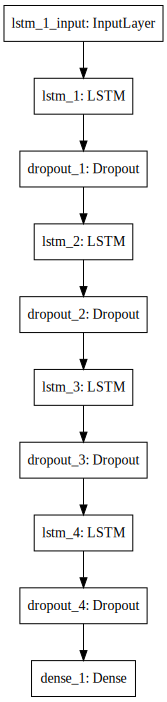

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

모델을 컴파일 합니다.

In [14]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

데이터의 형태를 확인합니다.

In [15]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_train: (327, 10, 2)
y_train: (327, 2)


## 모델 훈련

이제 컴파일한 모델을 훈련시킵니다.

In [16]:
model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False)

Epoch 1/1
327/327 [==============================] - 37s 112ms/step - loss: 0.0206


model.fit() 을 여러번 수행시켜 모델을 계속해서 훈련시킬 수 있습니다.

In [17]:
train_count = 5
for i in range(train_count):
    print("train_step:{}".format(i+1))
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False)
    model.reset_states()

train_step:1
Epoch 1/1
327/327 [==============================] - 25s 77ms/step - loss: 0.0145
train_step:2
Epoch 1/1
327/327 [==============================] - 24s 74ms/step - loss: 0.0211
train_step:3
Epoch 1/1
327/327 [==============================] - 26s 78ms/step - loss: 0.0338
train_step:4
Epoch 1/1
327/327 [==============================] - 24s 73ms/step - loss: 0.0391
train_step:5
Epoch 1/1
327/327 [==============================] - 24s 73ms/step - loss: 0.0383


In [18]:
xhat = x_train[0]
prediction = model.predict(np.array([xhat]), batch_size=1)

예측한 값과 실제값을 확인해 봅니다. 처음에는 상당히 다른값을 보일 것입니다. train 횟수를 늘려가면서 확인해보면 점점 비슷해 지는 것을 확인할 수 있습니다.

In [19]:
print("y:", y_train[0])
print("p:", prediction)

y: [ 0.88607595  0.84599156]
p: [[ 0.208258    0.20955983]]


## 그래프 확인

예측할 데이터는 y_train이므로, y_train의 데이터를 그래프로 확인해 보겠습니다. 사용한 feature 는 high, low 2개이므로 2개의 그래프가 같이 그려집니다.

In [20]:
import matplotlib.pyplot as plt
plt.plot(y_train)
plt.show()

여기에 예측한 데이터를 같이 표시하기 위해 예측 데이터를 생성합니다.

`model.predict()`로 다음 데이터를 생성하고, 나온 결과값을 이용하여 그 다음 값을 예측합니다.

In [21]:
data_size = len(y_train)

xhat = x_train[0]
high_list = np.zeros((data_size))
low_list = np.zeros((data_size))

for i in range(len(y_train)):
    prediction = model.predict(np.array([xhat]), batch_size=1)        
    prediction = prediction[0]
    high_list[i] = prediction[0]
    low_list[i] = prediction[1]
    xhat = np.vstack([xhat[1:],prediction])

나온 예측값을 데이터와 함께 그래프로 출력합니다.

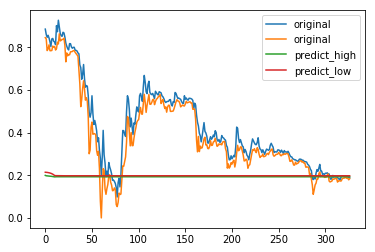

In [22]:
plt.plot(y_train, label="original")
plt.plot(high_list, label="predict_high")
plt.plot(low_list, label="predict_low")
plt.legend()
plt.show()

## 이어서...

모델을 저장하고, 반복해서 학습시키겠습니다.